# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [1]:
from google.colab import files
data = files.upload()

Saving Classified Data to Classified Data


Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

create a df and import data

In [15]:
df = pd.read_csv("Classified Data",index_col=0)

In [16]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


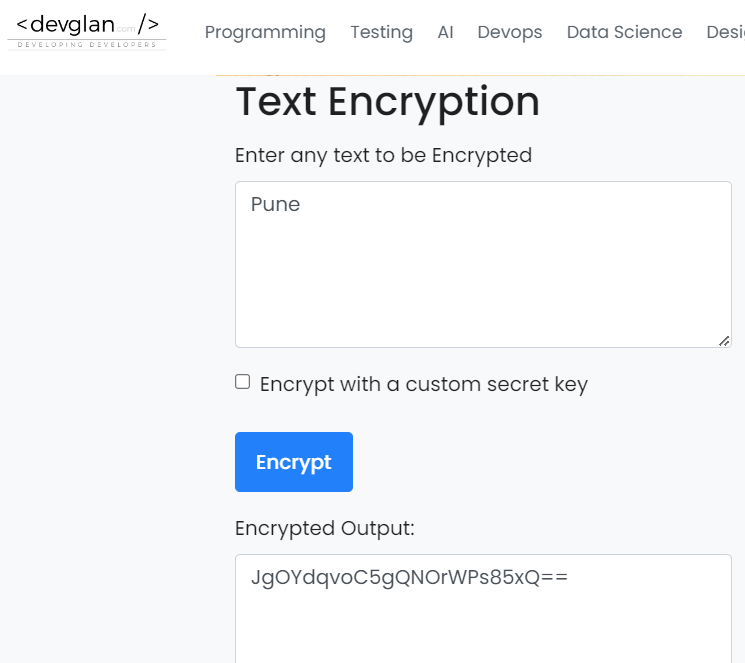

In [18]:
df.corr()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,1.000000,-0.235255,-0.301018,-0.101517,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889,0.551394
PTI,-0.235255,1.000000,0.271908,0.001580,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834,-0.468748
EQW,-0.301018,0.271908,1.000000,-0.040291,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143,-0.598120
SBI,-0.101517,0.001580,-0.040291,1.000000,-0.007983,0.022026,-0.007666,0.037767,0.078032,0.145045,0.028874
LQE,-0.083401,0.097322,0.144539,-0.007983,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496,-0.205043
QWG,-0.183628,0.173701,0.182021,0.022026,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078,-0.327664
FDJ,-0.148100,0.095060,0.059533,-0.007666,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923,-0.214885
PJF,-0.330977,0.246387,0.323857,0.037767,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012,-0.571483
HQE,0.324981,-0.266242,-0.324656,0.078032,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283,0.643989
NXJ,-0.073889,0.035834,0.126143,0.145045,0.044496,0.036078,-0.012923,0.028012,-0.129283,1.000000,-0.111730


In [19]:
df.mean()

WTT             0.949682
PTI             1.114303
EQW             0.834127
SBI             0.682099
LQE             1.032336
QWG             0.943534
FDJ             0.963422
PJF             1.071960
HQE             1.158251
NXJ             1.362725
TARGET CLASS    0.500000
dtype: float64

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [24]:
transformed_data = ss.fit_transform(df.drop('TARGET CLASS',axis=1))

In [31]:
df.columns[0:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [32]:
df_transformed_data = pd.DataFrame(data=transformed_data,columns=df.columns[0:-1])

In [33]:
df_transformed_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [34]:
df_transformed_data.mean()

WTT    1.119105e-16
PTI   -2.939871e-16
EQW   -1.203482e-16
SBI   -1.882938e-16
LQE   -6.057377e-16
QWG    3.552714e-17
FDJ    2.255973e-16
PJF   -4.760636e-16
HQE    3.197442e-16
NXJ    4.503065e-16
dtype: float64

In [35]:
df_transformed_data.corr()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
WTT,1.000000,-0.235255,-0.301018,-0.101517,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889
PTI,-0.235255,1.000000,0.271908,0.001580,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834
EQW,-0.301018,0.271908,1.000000,-0.040291,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143
SBI,-0.101517,0.001580,-0.040291,1.000000,-0.007983,0.022026,-0.007666,0.037767,0.078032,0.145045
LQE,-0.083401,0.097322,0.144539,-0.007983,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496
QWG,-0.183628,0.173701,0.182021,0.022026,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078
FDJ,-0.148100,0.095060,0.059533,-0.007666,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923
PJF,-0.330977,0.246387,0.323857,0.037767,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012
HQE,0.324981,-0.266242,-0.324656,0.078032,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283
NXJ,-0.073889,0.035834,0.126143,0.145045,0.044496,0.036078,-0.012923,0.028012,-0.129283,1.000000


In [36]:
df.corr()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,1.000000,-0.235255,-0.301018,-0.101517,-0.083401,-0.183628,-0.148100,-0.330977,0.324981,-0.073889,0.551394
PTI,-0.235255,1.000000,0.271908,0.001580,0.097322,0.173701,0.095060,0.246387,-0.266242,0.035834,-0.468748
EQW,-0.301018,0.271908,1.000000,-0.040291,0.144539,0.182021,0.059533,0.323857,-0.324656,0.126143,-0.598120
SBI,-0.101517,0.001580,-0.040291,1.000000,-0.007983,0.022026,-0.007666,0.037767,0.078032,0.145045,0.028874
LQE,-0.083401,0.097322,0.144539,-0.007983,1.000000,0.049944,0.035750,0.083734,-0.143929,0.044496,-0.205043
QWG,-0.183628,0.173701,0.182021,0.022026,0.049944,1.000000,0.098062,0.199189,-0.181809,0.036078,-0.327664
FDJ,-0.148100,0.095060,0.059533,-0.007666,0.035750,0.098062,1.000000,0.122888,-0.116969,-0.012923,-0.214885
PJF,-0.330977,0.246387,0.323857,0.037767,0.083734,0.199189,0.122888,1.000000,-0.363736,0.028012,-0.571483
HQE,0.324981,-0.266242,-0.324656,0.078032,-0.143929,-0.181809,-0.116969,-0.363736,1.000000,-0.129283,0.643989
NXJ,-0.073889,0.035834,0.126143,0.145045,0.044496,0.036078,-0.012923,0.028012,-0.129283,1.000000,-0.111730


In [37]:
x = df_transformed_data
y = df["TARGET CLASS"]

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,train_size=.8)

In [40]:
x_train.shape

(800, 10)

In [41]:
x_test.shape

(200, 10)